<a href="https://colab.research.google.com/github/Miss-Pradhi/ML-LAB-Assignment/blob/main/LAB-4_Implement_simple_and_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=False)

# Create a Pandas DataFrame from housing.data and name the columns
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable as a new column named 'MedHouseVal'
df['MedHouseVal'] = housing.target

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveB

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Select 'MedInc' as the independent variable (X) and 'MedHouseVal' as the dependent variable (y)
X = df[['MedInc']]
y = df['MedHouseVal']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize a LinearRegression model
model = LinearRegression()

# 4. Train the model using the training data
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.6299
Mean Squared Error (MSE): 0.7091
Root Mean Squared Error (RMSE): 0.8421
R-squared (R2) Score: 0.4589


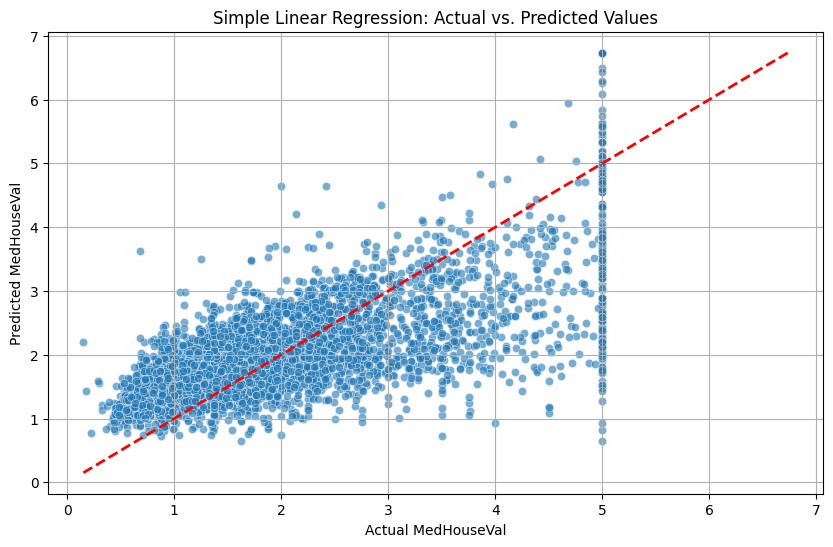

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Add a title and labels
plt.title('Simple Linear Regression: Actual vs. Predicted Values')
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')

# Draw a red dashed line representing the ideal scenario (actual = predicted)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

# Display the plot
plt.grid(True)
plt.show()


In [4]:
import numpy as np

# 1. Select all features except 'MedHouseVal' as the independent variables (X_multi) and 'MedHouseVal' as the dependent variable (y_multi)
X_multi = df.drop('MedHouseVal', axis=1)
y_multi = df['MedHouseVal']

# 2. Split the data into training and testing sets for multiple linear regression
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# 3. Initialize a new LinearRegression model for multiple linear regression
model_multi = LinearRegression()

# 4. Train this new model using X_train_multi and y_train_multi
model_multi.fit(X_train_multi, y_train_multi)

# 5. Make predictions on X_test_multi and store them in y_pred_multi
y_pred_multi = model_multi.predict(X_test_multi)

# 6. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Multiple Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_multi:.4f}")
print(f"Mean Squared Error (MSE): {mse_multi:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multi:.4f}")
print(f"R-squared (R2) Score: {r2_multi:.4f}")

Multiple Linear Regression Metrics:
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R-squared (R2) Score: 0.5758


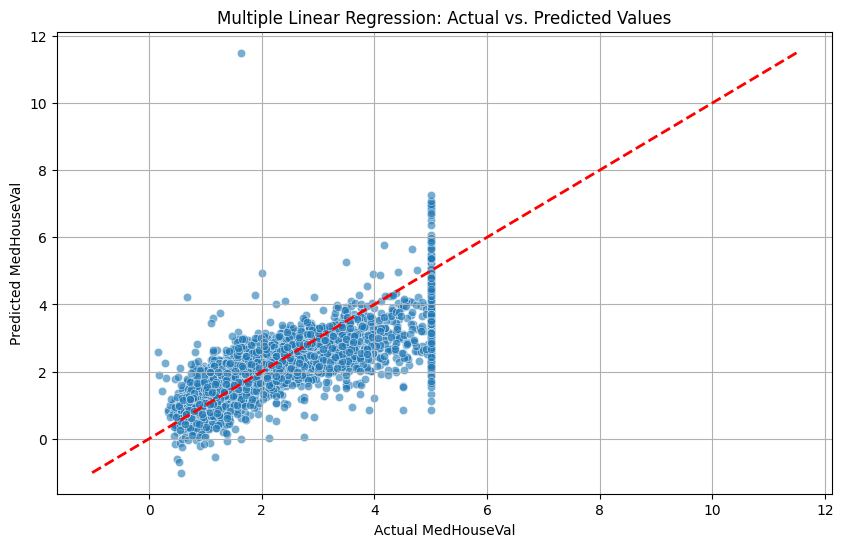

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values for multiple linear regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_multi, y=y_pred_multi, alpha=0.6)

# Add a title and labels
plt.title('Multiple Linear Regression: Actual vs. Predicted Values')
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')

# Draw a red dashed line representing the ideal scenario (actual = predicted)
min_val_multi = min(y_test_multi.min(), y_pred_multi.min())
max_val_multi = max(y_test_multi.max(), y_pred_multi.max())
plt.plot([min_val_multi, max_val_multi], [min_val_multi, max_val_multi], 'r--', lw=2)

# Display the plot
plt.grid(True)
plt.show()

In [6]:
import pandas as pd

# 1. Print metrics for Simple Linear Regression
print("Simple Linear Regression Metrics:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R-squared (R2) Score: {r2:.4f}")
print("\n")

# 2. Print metrics for Multiple Linear Regression (already done in previous cell, but reprinting for clarity)
print("Multiple Linear Regression Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_multi:.4f}")
print(f"  Mean Squared Error (MSE): {mse_multi:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_multi:.4f}")
print(f"  R-squared (R2) Score: {r2_multi:.4f}")
print("\n")

# 3. Create a pandas DataFrame for comparison
comparison_data = {
    'Simple Linear Regression': [mae, mse, rmse, r2],
    'Multiple Linear Regression': [mae_multi, mse_multi, rmse_multi, r2_multi]
}
metrics_df = pd.DataFrame(comparison_data, index=['MAE', 'MSE', 'RMSE', 'R2 Score'])

# 4. Display the comparison DataFrame
print("Comparison of Model Performance:")
print(metrics_df.round(4))


Simple Linear Regression Metrics:
  Mean Absolute Error (MAE): 0.6299
  Mean Squared Error (MSE): 0.7091
  Root Mean Squared Error (RMSE): 0.8421
  R-squared (R2) Score: 0.4589


Multiple Linear Regression Metrics:
  Mean Absolute Error (MAE): 0.5332
  Mean Squared Error (MSE): 0.5559
  Root Mean Squared Error (RMSE): 0.7456
  R-squared (R2) Score: 0.5758


Comparison of Model Performance:
          Simple Linear Regression  Multiple Linear Regression
MAE                         0.6299                      0.5332
MSE                         0.7091                      0.5559
RMSE                        0.8421                      0.7456
R2 Score                    0.4589                      0.5758
